In [1]:
#Windows 10
#Python 3.8.3
#Jupyter Notebook
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
#Loading the training set
training = np.genfromtxt('training_set.csv',delimiter=',')
_, training_cols = training.shape

training_labels = np.genfromtxt('training_labels.csv', delimiter=',')
training_labels

array([3., 1., 3., ..., 8., 5., 3.])

In [3]:
#Loading the validation set
validation = np.genfromtxt('validation_set.csv',delimiter=',')
validation_labels = np.genfromtxt('validation_labels.csv',delimiter=',')

In [4]:
#Stores the data from the training set
input = training
print(input.shape)
input

(6720, 354)


array([[1.13217359e-02, 1.24335762e-02, 1.36974070e-04, ...,
        3.31480199e-03, 9.68612342e-01, 9.92355292e-02],
       [3.57520000e-02, 7.30890000e-03, 9.56850000e-04, ...,
        7.46310000e-03, 9.92390000e-01, 8.09120000e-02],
       [7.91025563e-03, 7.31285209e-03, 2.60660312e-04, ...,
        7.59869062e-03, 9.12818035e-01, 1.24969510e-01],
       ...,
       [2.87876078e-02, 2.82979535e-03, 0.00000000e+00, ...,
        0.00000000e+00, 9.51997729e-01, 3.10457899e-02],
       [1.92720465e-02, 1.63407421e-02, 0.00000000e+00, ...,
        5.80316165e-03, 9.42353589e-01, 9.52913062e-02],
       [9.45855415e-03, 5.43823052e-03, 1.24052310e-05, ...,
        9.06081043e-03, 6.27831671e-01, 1.36773463e-01]])

In [5]:
#Determines the number of classes to classify
classes = np.unique(training_labels) 

#Storing and converting the labels into an array of 1s and 0s
output = np.zeros((len(training_labels),len(classes)))

for n in range(len(training_labels)):
    np.add.at(output[n], int(training_labels[n]-1), 1)
    
output

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [6]:
#Storing the validation set
val_input = validation
print(val_input.shape)
val_input

(2240, 354)


array([[4.97510000e-03, 3.00180000e-03, 0.00000000e+00, ...,
        1.24440000e-02, 9.68220000e-01, 1.09000000e-01],
       [1.41204709e-02, 7.55072910e-03, 0.00000000e+00, ...,
        1.59094327e-03, 9.93895376e-01, 3.92479630e-02],
       [4.13462503e-03, 4.42619796e-03, 5.70233863e-05, ...,
        2.14641327e-03, 9.61520433e-01, 9.88302424e-02],
       ...,
       [6.48590000e-02, 1.98430000e-02, 0.00000000e+00, ...,
        6.92040000e-03, 9.51030000e-01, 8.31320000e-02],
       [6.74461792e-02, 2.79559486e-02, 0.00000000e+00, ...,
        2.41649121e-03, 9.53106850e-01, 4.20243078e-02],
       [5.58736814e-03, 8.13927708e-03, 1.19718680e-05, ...,
        2.19153844e-03, 9.58995489e-01, 8.16313293e-02]])

In [7]:
#Storing and converting the labels into an array of 1s and 0s
val_output = np.zeros((len(validation_labels),len(classes)))

for n in range(len(validation_labels)):
    np.add.at(val_output[n], int(validation_labels[n]-1), 1)
    
val_output

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [8]:
#Defining the architecture of the neural network
nn_in = training_cols
nn_h1 = 20
nn_h2 = 20
nn_out = len(classes)

In [9]:
#Setting the learning rate
lr = 0.1

#Weight adjustment
wa = -0.1+(0.1+0.1)

#Number of outputs
total_output = len(training_labels)

In [10]:
#Constructing the matrices
x_in = np.zeros((nn_in))
w_h1 = wa*np.random.rand(nn_h1,nn_in)
b_h1 = wa*np.random.rand(nn_h1)
w_h2 = wa*np.random.rand(nn_h2,nn_h1)
b_h2 = wa*np.random.rand(nn_h2)
w_out = wa*np.random.rand(nn_out,nn_h2)
b_out = wa*np.random.rand(nn_out)
d_out = np.zeros((nn_out))

In [11]:
import timeit #Calculating the runtime

start = timeit.default_timer()

#Stores the errors and iteration number
batches = 10000 #This denotes the number of training batches to be conducted, this is the maximum
error_array = np.zeros((batches,2))
total_err = np.zeros((batches,1))
prev_w_h1 = wa*np.zeros((nn_h1,nn_in))
prev_w_h2 = wa*np.zeros((nn_h2,nn_h1))
prev_w_out = wa*np.zeros((nn_out,nn_h2))
#Training and Validation phase
for batch in range(batches):
    p = np.random.permutation(total_output) #Shuffling the dataset

    for n in range(total_output): #Iterates over the total number of outputs, taking in one set of inputs at a time
        idx = p[n] #Stores the shuffled index
        x_in = input[idx]
        d_out = output[idx]
        
        v_h1 = w_h1@x_in + b_h1
        y_h1 = 1/(1+np.exp(-v_h1))
        
        v_h2 = w_h2@y_h1 + b_h2
        y_h2 = 1/(1+np.exp(-v_h2))
        
        v_out = w_out@y_h2 + b_out
        out = 1/(1+np.exp(-v_out))
        
        err = d_out - out
        
        #compute gradient in output layer
        delta_out = err*out*(1 - out)
        
        #compute gradient in hidden layer 2
        delta_h2 = y_h2*(1-y_h2)*(delta_out@w_out)
        
        # compute gradient in hidden layer 1
        delta_h1 = (y_h1*(1-y_h1)*(delta_h2@w_h2))
        
        delta_out_w = delta_out.reshape(-1,1) #Adjust the shape of the gradients
        delta_h2_w = delta_h2.reshape(-1,1)
        delta_h1_w = delta_h1.reshape(-1,1)
        
        # update weights and biases in output layer
        w_out = w_out +lr*delta_out_w*y_h2
        b_out = b_out + lr*delta_out

        # update weights and biases in hidden layer 2
        w_h2 = w_h2 +lr*delta_h2_w*y_h1
        b_h2 = b_h2 + lr*delta_h2

        # update weights and biases in hidden layer 1
        w_h1 = w_h1 +lr*delta_h1_w*x_in
        b_h1 = b_h1 + lr*delta_h1
        
    #Testing the weights on the validation set
    for q in range(len(validation_labels)):
        x_in = val_input[q]
        d_out = val_output[q]
        # hidden layer 1
        v_h1 = w_h1@x_in + b_h1
        y_h1 = 1./(1+np.exp(-v_h1))
        # hidden layer 2
        v_h2 = w_h2@y_h1 + b_h2
        y_h2 = 1./(1+np.exp(-v_h2))
        # output layer
        v_out = w_out@y_h2 + b_out
        out = 1./(1+np.exp(-v_out))
        err = d_out - out
    
        
    total_err[batch] = sum(0.5*err*err)
    average_err = sum(total_err)/np.count_nonzero(total_err)
    print('Iteration: [{}/{}] Error: {:.8f} Average Error: {:.8f}'.format(batch,batches,total_err[batch].item(),
                                                                          average_err.item()))
    error_array[batch,0] = batch
    error_array[batch,1] = average_err.item()
    if average_err < 0.01:
        error_array = error_array[:batch+1]
        break

stop = timeit.default_timer()

print('Time: ', stop - start)  

Iteration: [0/10000] Error: 0.46601749 Average Error: 0.46601749
Iteration: [1/10000] Error: 0.44058613 Average Error: 0.45330181
Iteration: [2/10000] Error: 0.42167455 Average Error: 0.44275939
Iteration: [3/10000] Error: 0.45053649 Average Error: 0.44470366
Iteration: [4/10000] Error: 0.41616347 Average Error: 0.43899562
Iteration: [5/10000] Error: 0.43045355 Average Error: 0.43757195
Iteration: [6/10000] Error: 0.42124938 Average Error: 0.43524015
Iteration: [7/10000] Error: 0.44374501 Average Error: 0.43630326
Iteration: [8/10000] Error: 0.42750629 Average Error: 0.43532582
Iteration: [9/10000] Error: 0.46276809 Average Error: 0.43807005
Iteration: [10/10000] Error: 0.45523961 Average Error: 0.43963091
Iteration: [11/10000] Error: 0.44153066 Average Error: 0.43978923
Iteration: [12/10000] Error: 0.43700500 Average Error: 0.43957505
Iteration: [13/10000] Error: 0.41130638 Average Error: 0.43755586
Iteration: [14/10000] Error: 0.41249970 Average Error: 0.43588545
Iteration: [15/10000

Iteration: [124/10000] Error: 0.00000925 Average Error: 0.13723412
Iteration: [125/10000] Error: 0.00000018 Average Error: 0.13614497
Iteration: [126/10000] Error: 0.00000231 Average Error: 0.13507298
Iteration: [127/10000] Error: 0.00003396 Average Error: 0.13401798
Iteration: [128/10000] Error: 0.00008181 Average Error: 0.13297972
Iteration: [129/10000] Error: 0.00001418 Average Error: 0.13195691
Iteration: [130/10000] Error: 0.00000495 Average Error: 0.13094964
Iteration: [131/10000] Error: 0.00001589 Average Error: 0.12995772
Iteration: [132/10000] Error: 0.00000090 Average Error: 0.12898060
Iteration: [133/10000] Error: 0.00000688 Average Error: 0.12801811
Iteration: [134/10000] Error: 0.00000870 Average Error: 0.12706989
Iteration: [135/10000] Error: 0.00000486 Average Error: 0.12613559
Iteration: [136/10000] Error: 0.00000160 Average Error: 0.12521490
Iteration: [137/10000] Error: 0.00000046 Average Error: 0.12430755
Iteration: [138/10000] Error: 0.00000315 Average Error: 0.1234

Iteration: [247/10000] Error: 0.00000016 Average Error: 0.06917238
Iteration: [248/10000] Error: 0.00000001 Average Error: 0.06889458
Iteration: [249/10000] Error: 0.00000072 Average Error: 0.06861900
Iteration: [250/10000] Error: 0.00000000 Average Error: 0.06834562
Iteration: [251/10000] Error: 0.00000016 Average Error: 0.06807441
Iteration: [252/10000] Error: 0.00000004 Average Error: 0.06780534
Iteration: [253/10000] Error: 0.00000009 Average Error: 0.06753839
Iteration: [254/10000] Error: 0.00000002 Average Error: 0.06727353
Iteration: [255/10000] Error: 0.00000004 Average Error: 0.06701075
Iteration: [256/10000] Error: 0.00000002 Average Error: 0.06675000
Iteration: [257/10000] Error: 0.00000004 Average Error: 0.06649128
Iteration: [258/10000] Error: 0.00000015 Average Error: 0.06623456
Iteration: [259/10000] Error: 0.00000001 Average Error: 0.06597981
Iteration: [260/10000] Error: 0.00000014 Average Error: 0.06572702
Iteration: [261/10000] Error: 0.00000283 Average Error: 0.0654

Iteration: [370/10000] Error: 0.00000005 Average Error: 0.04624288
Iteration: [371/10000] Error: 0.00000020 Average Error: 0.04611857
Iteration: [372/10000] Error: 0.00000003 Average Error: 0.04599493
Iteration: [373/10000] Error: 0.00000013 Average Error: 0.04587195
Iteration: [374/10000] Error: 0.00000003 Average Error: 0.04574963
Iteration: [375/10000] Error: 0.00000002 Average Error: 0.04562795
Iteration: [376/10000] Error: 0.00000002 Average Error: 0.04550692
Iteration: [377/10000] Error: 0.00000001 Average Error: 0.04538653
Iteration: [378/10000] Error: 0.00000001 Average Error: 0.04526678
Iteration: [379/10000] Error: 0.00000001 Average Error: 0.04514766
Iteration: [380/10000] Error: 0.00000010 Average Error: 0.04502916
Iteration: [381/10000] Error: 0.00000004 Average Error: 0.04491128
Iteration: [382/10000] Error: 0.00000001 Average Error: 0.04479402
Iteration: [383/10000] Error: 0.00000001 Average Error: 0.04467737
Iteration: [384/10000] Error: 0.00000004 Average Error: 0.0445

Iteration: [493/10000] Error: 0.00000000 Average Error: 0.03472961
Iteration: [494/10000] Error: 0.00000000 Average Error: 0.03465944
Iteration: [495/10000] Error: 0.00000000 Average Error: 0.03458957
Iteration: [496/10000] Error: 0.00000000 Average Error: 0.03451997
Iteration: [497/10000] Error: 0.00000001 Average Error: 0.03445065
Iteration: [498/10000] Error: 0.00000001 Average Error: 0.03438161
Iteration: [499/10000] Error: 0.00000001 Average Error: 0.03431285
Iteration: [500/10000] Error: 0.00000000 Average Error: 0.03424436
Iteration: [501/10000] Error: 0.00000054 Average Error: 0.03417615
Iteration: [502/10000] Error: 0.00000001 Average Error: 0.03410820
Iteration: [503/10000] Error: 0.00000002 Average Error: 0.03404053
Iteration: [504/10000] Error: 0.00000001 Average Error: 0.03397312
Iteration: [505/10000] Error: 0.00000001 Average Error: 0.03390598
Iteration: [506/10000] Error: 0.00000000 Average Error: 0.03383910
Iteration: [507/10000] Error: 0.00000002 Average Error: 0.0337

Iteration: [616/10000] Error: 0.00000000 Average Error: 0.02780620
Iteration: [617/10000] Error: 0.00000000 Average Error: 0.02776121
Iteration: [618/10000] Error: 0.00000000 Average Error: 0.02771636
Iteration: [619/10000] Error: 0.00000000 Average Error: 0.02767166
Iteration: [620/10000] Error: 0.00000001 Average Error: 0.02762710
Iteration: [621/10000] Error: 0.00000000 Average Error: 0.02758268
Iteration: [622/10000] Error: 0.00000001 Average Error: 0.02753841
Iteration: [623/10000] Error: 0.00000000 Average Error: 0.02749427
Iteration: [624/10000] Error: 0.00000000 Average Error: 0.02745028
Iteration: [625/10000] Error: 0.00000000 Average Error: 0.02740643
Iteration: [626/10000] Error: 0.00000000 Average Error: 0.02736272
Iteration: [627/10000] Error: 0.00000000 Average Error: 0.02731915
Iteration: [628/10000] Error: 0.00000000 Average Error: 0.02727572
Iteration: [629/10000] Error: 0.00000000 Average Error: 0.02723242
Iteration: [630/10000] Error: 0.00000002 Average Error: 0.0271

Iteration: [739/10000] Error: 0.00000000 Average Error: 0.02318436
Iteration: [740/10000] Error: 0.00000000 Average Error: 0.02315307
Iteration: [741/10000] Error: 0.00000000 Average Error: 0.02312187
Iteration: [742/10000] Error: 0.00000000 Average Error: 0.02309075
Iteration: [743/10000] Error: 0.00000000 Average Error: 0.02305971
Iteration: [744/10000] Error: 0.00000000 Average Error: 0.02302876
Iteration: [745/10000] Error: 0.00000000 Average Error: 0.02299789
Iteration: [746/10000] Error: 0.00000000 Average Error: 0.02296711
Iteration: [747/10000] Error: 0.00000000 Average Error: 0.02293640
Iteration: [748/10000] Error: 0.00000000 Average Error: 0.02290578
Iteration: [749/10000] Error: 0.00000001 Average Error: 0.02287524
Iteration: [750/10000] Error: 0.00000000 Average Error: 0.02284478
Iteration: [751/10000] Error: 0.00000000 Average Error: 0.02281440
Iteration: [752/10000] Error: 0.00000000 Average Error: 0.02278410
Iteration: [753/10000] Error: 0.00000000 Average Error: 0.0227

Iteration: [862/10000] Error: 0.00000000 Average Error: 0.01987999
Iteration: [863/10000] Error: 0.00000000 Average Error: 0.01985698
Iteration: [864/10000] Error: 0.00000001 Average Error: 0.01983402
Iteration: [865/10000] Error: 0.00000000 Average Error: 0.01981112
Iteration: [866/10000] Error: 0.00000000 Average Error: 0.01978827
Iteration: [867/10000] Error: 0.00000000 Average Error: 0.01976547
Iteration: [868/10000] Error: 0.00000000 Average Error: 0.01974273
Iteration: [869/10000] Error: 0.00000000 Average Error: 0.01972004
Iteration: [870/10000] Error: 0.00000000 Average Error: 0.01969739
Iteration: [871/10000] Error: 0.00000001 Average Error: 0.01967481
Iteration: [872/10000] Error: 0.00000002 Average Error: 0.01965227
Iteration: [873/10000] Error: 0.00054036 Average Error: 0.01963040
Iteration: [874/10000] Error: 0.00000000 Average Error: 0.01960797
Iteration: [875/10000] Error: 0.00000000 Average Error: 0.01958558
Iteration: [876/10000] Error: 0.00000000 Average Error: 0.0195

Iteration: [985/10000] Error: 0.00000000 Average Error: 0.01740058
Iteration: [986/10000] Error: 0.00000000 Average Error: 0.01738295
Iteration: [987/10000] Error: 0.00000000 Average Error: 0.01736536
Iteration: [988/10000] Error: 0.00000000 Average Error: 0.01734780
Iteration: [989/10000] Error: 0.00000000 Average Error: 0.01733027
Iteration: [990/10000] Error: 0.00000000 Average Error: 0.01731279
Iteration: [991/10000] Error: 0.00000000 Average Error: 0.01729533
Iteration: [992/10000] Error: 0.00000000 Average Error: 0.01727792
Iteration: [993/10000] Error: 0.00000000 Average Error: 0.01726053
Iteration: [994/10000] Error: 0.00000000 Average Error: 0.01724319
Iteration: [995/10000] Error: 0.00000000 Average Error: 0.01722588
Iteration: [996/10000] Error: 0.00000000 Average Error: 0.01720860
Iteration: [997/10000] Error: 0.00000000 Average Error: 0.01719135
Iteration: [998/10000] Error: 0.00000000 Average Error: 0.01717415
Iteration: [999/10000] Error: 0.00000000 Average Error: 0.0171

Iteration: [1106/10000] Error: 0.00000000 Average Error: 0.01549862
Iteration: [1107/10000] Error: 0.00000000 Average Error: 0.01548463
Iteration: [1108/10000] Error: 0.00000000 Average Error: 0.01547067
Iteration: [1109/10000] Error: 0.00000000 Average Error: 0.01545673
Iteration: [1110/10000] Error: 0.00000000 Average Error: 0.01544282
Iteration: [1111/10000] Error: 0.00000000 Average Error: 0.01542893
Iteration: [1112/10000] Error: 0.00000000 Average Error: 0.01541507
Iteration: [1113/10000] Error: 0.00000000 Average Error: 0.01540123
Iteration: [1114/10000] Error: 0.00000000 Average Error: 0.01538742
Iteration: [1115/10000] Error: 0.00000000 Average Error: 0.01537363
Iteration: [1116/10000] Error: 0.00000000 Average Error: 0.01535987
Iteration: [1117/10000] Error: 0.00000000 Average Error: 0.01534613
Iteration: [1118/10000] Error: 0.00000000 Average Error: 0.01533241
Iteration: [1119/10000] Error: 0.00000000 Average Error: 0.01531872
Iteration: [1120/10000] Error: 0.00000000 Averag

Iteration: [1227/10000] Error: 0.00000000 Average Error: 0.01397148
Iteration: [1228/10000] Error: 0.00000000 Average Error: 0.01396011
Iteration: [1229/10000] Error: 0.00000000 Average Error: 0.01394876
Iteration: [1230/10000] Error: 0.00000000 Average Error: 0.01393743
Iteration: [1231/10000] Error: 0.00000000 Average Error: 0.01392611
Iteration: [1232/10000] Error: 0.00000000 Average Error: 0.01391482
Iteration: [1233/10000] Error: 0.00000000 Average Error: 0.01390354
Iteration: [1234/10000] Error: 0.00000000 Average Error: 0.01389228
Iteration: [1235/10000] Error: 0.00000000 Average Error: 0.01388105
Iteration: [1236/10000] Error: 0.00000000 Average Error: 0.01386982
Iteration: [1237/10000] Error: 0.00000000 Average Error: 0.01385862
Iteration: [1238/10000] Error: 0.00000000 Average Error: 0.01384743
Iteration: [1239/10000] Error: 0.00000000 Average Error: 0.01383627
Iteration: [1240/10000] Error: 0.00000000 Average Error: 0.01382512
Iteration: [1241/10000] Error: 0.00000000 Averag

Iteration: [1348/10000] Error: 0.00000000 Average Error: 0.01271829
Iteration: [1349/10000] Error: 0.00000000 Average Error: 0.01270887
Iteration: [1350/10000] Error: 0.00000000 Average Error: 0.01269946
Iteration: [1351/10000] Error: 0.00000000 Average Error: 0.01269007
Iteration: [1352/10000] Error: 0.00000000 Average Error: 0.01268069
Iteration: [1353/10000] Error: 0.00000000 Average Error: 0.01267132
Iteration: [1354/10000] Error: 0.00000000 Average Error: 0.01266197
Iteration: [1355/10000] Error: 0.00000000 Average Error: 0.01265263
Iteration: [1356/10000] Error: 0.00000000 Average Error: 0.01264331
Iteration: [1357/10000] Error: 0.00000000 Average Error: 0.01263400
Iteration: [1358/10000] Error: 0.00000000 Average Error: 0.01262470
Iteration: [1359/10000] Error: 0.00000000 Average Error: 0.01261542
Iteration: [1360/10000] Error: 0.00000000 Average Error: 0.01260615
Iteration: [1361/10000] Error: 0.00000000 Average Error: 0.01259690
Iteration: [1362/10000] Error: 0.00000000 Averag

Iteration: [1469/10000] Error: 0.00000000 Average Error: 0.01167141
Iteration: [1470/10000] Error: 0.00000000 Average Error: 0.01166348
Iteration: [1471/10000] Error: 0.00000000 Average Error: 0.01165555
Iteration: [1472/10000] Error: 0.00000000 Average Error: 0.01164764
Iteration: [1473/10000] Error: 0.00000000 Average Error: 0.01163974
Iteration: [1474/10000] Error: 0.00000000 Average Error: 0.01163185
Iteration: [1475/10000] Error: 0.00000000 Average Error: 0.01162396
Iteration: [1476/10000] Error: 0.00000000 Average Error: 0.01161609
Iteration: [1477/10000] Error: 0.00000000 Average Error: 0.01160824
Iteration: [1478/10000] Error: 0.00000000 Average Error: 0.01160039
Iteration: [1479/10000] Error: 0.00000000 Average Error: 0.01159255
Iteration: [1480/10000] Error: 0.00000000 Average Error: 0.01158472
Iteration: [1481/10000] Error: 0.00000000 Average Error: 0.01157690
Iteration: [1482/10000] Error: 0.00000000 Average Error: 0.01156910
Iteration: [1483/10000] Error: 0.00000000 Averag

Iteration: [1590/10000] Error: 0.00000000 Average Error: 0.01078377
Iteration: [1591/10000] Error: 0.00000000 Average Error: 0.01077699
Iteration: [1592/10000] Error: 0.00000000 Average Error: 0.01077023
Iteration: [1593/10000] Error: 0.00000000 Average Error: 0.01076347
Iteration: [1594/10000] Error: 0.00000000 Average Error: 0.01075672
Iteration: [1595/10000] Error: 0.00000000 Average Error: 0.01074998
Iteration: [1596/10000] Error: 0.00000000 Average Error: 0.01074325
Iteration: [1597/10000] Error: 0.00000000 Average Error: 0.01073653
Iteration: [1598/10000] Error: 0.00000000 Average Error: 0.01072981
Iteration: [1599/10000] Error: 0.00000000 Average Error: 0.01072311
Iteration: [1600/10000] Error: 0.00000000 Average Error: 0.01071641
Iteration: [1601/10000] Error: 0.00000000 Average Error: 0.01070972
Iteration: [1602/10000] Error: 0.00000000 Average Error: 0.01070304
Iteration: [1603/10000] Error: 0.00000000 Average Error: 0.01069637
Iteration: [1604/10000] Error: 0.00000000 Averag

Iteration: [1711/10000] Error: 0.00000000 Average Error: 0.01002160
Iteration: [1712/10000] Error: 0.00000000 Average Error: 0.01001575
Iteration: [1713/10000] Error: 0.00000000 Average Error: 0.01000990
Iteration: [1714/10000] Error: 0.00000000 Average Error: 0.01000407
Iteration: [1715/10000] Error: 0.00000000 Average Error: 0.00999824
Time:  750.1110754


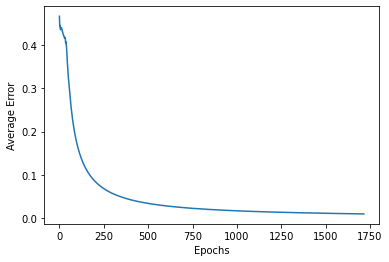

In [12]:
error_x = error_array[:,0]
error_y = error_array[:,1]
plt.plot(error_x, error_y)
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.show()

In [13]:
testing = np.genfromtxt('test_set.csv',delimiter=',')
test_input = testing

testing_labels = np.genfromtxt('test_labels.csv',delimiter=',')

#Storing and converting the labels into an array of 1s and 0s
test_output = np.zeros((len(testing_labels),len(classes)))

for n in range(len(testing_labels)):
    np.add.at(test_output[n], int(testing_labels[n]-1), 1)

In [14]:
# TEST PHASE
nn_output = np.zeros(test_output.shape)
for n in range(len(testing_labels)):
    # read data
    x_in = test_input[n]
    d_out = test_output[n]
    # hidden layer 1
    v_h1 = w_h1@x_in + b_h1
    y_h1 = 1./(1+np.exp(-v_h1))
    # hidden layer 2
    v_h2 = w_h2@y_h1 + b_h2
    y_h2 = 1./(1+np.exp(-v_h2))
    # output layer
    v_out = w_out@y_h2 + b_out
    out = 1./(1+np.exp(-v_out))
    
    loc = np.argmax(out)
    nn_output[n,loc] = 1

In [15]:
nn_output[100]

array([0., 0., 0., 0., 1., 0., 0., 0.])

In [16]:
test_output[100]

array([0., 0., 0., 0., 1., 0., 0., 0.])

In [17]:
#Transforming the output array to labels
nn_test_pred = np.zeros((len(nn_output)))
for p in range(len(nn_output)):
    nn_test_pred[p] = np.argmax(nn_output[p])+1

In [18]:
Counter(nn_test_pred)

Counter({8.0: 280,
         3.0: 286,
         4.0: 291,
         6.0: 269,
         2.0: 282,
         7.0: 260,
         5.0: 286,
         1.0: 286})

In [19]:
Counter(testing_labels)

Counter({8.0: 278,
         3.0: 285,
         4.0: 292,
         6.0: 268,
         2.0: 281,
         7.0: 258,
         5.0: 286,
         1.0: 292})

In [20]:
#Accuracy of neural network
nn_accuracy = sum(nn_test_pred==testing_labels).item()/len(testing_labels)
nn_accuracy

0.9924107142857143

In [21]:
unknown = np.genfromtxt('unknown_labels_set.csv',delimiter=',')

In [22]:
unknown_input = unknown

In [23]:
#Predicting the labels of the unknown dataset
unknown_output = np.zeros((len(unknown),8))
for n in range(len(unknown)):
    # read data
    x_in = unknown_input[n]
    # hidden layer 1
    v_h1 = w_h1@x_in + b_h1
    y_h1 = 1./(1+np.exp(-v_h1))
    # hidden layer 2
    v_h2 = w_h2@y_h1 + b_h2
    y_h2 = 1./(1+np.exp(-v_h2))
    # output layer
    v_out = w_out@y_h2 + b_out
    out = 1./(1+np.exp(-v_out))
    
    loc = np.argmax(out)
    unknown_output[n,loc] = 1

In [24]:
unknown_output

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [25]:
#Transforming the output array to labels
nn_unknown_pred = np.zeros((len(unknown_output)))
for p in range(len(unknown_output)):
    nn_unknown_pred[p] = np.argmax(unknown_output[p])+1

In [26]:
Counter(nn_unknown_pred)

Counter({8.0: 347, 6.0: 160, 4.0: 79, 1.0: 56, 5.0: 47, 7.0: 11, 2.0: 1})

In [27]:
np.savetxt('predicted_ann.csv',nn_unknown_pred,delimiter=',')

In [28]:
from sklearn import svm
from sklearn.svm import SVC
import timeit #Calculating the runtime of the SVM classifier

start = timeit.default_timer()

svcclassifier = SVC(kernel='poly',degree=14)
svcclassifier.fit(input, training_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  2.6885505000000194


In [29]:
poly = svcclassifier.predict(test_input)

In [30]:
svm_accuracy = sum(poly==testing_labels).item()/len(testing_labels)
svm_accuracy

0.9910714285714286

In [31]:
#Predicting labels for the unknown dataset
svm_unknown_pred=svcclassifier.predict(unknown)

In [32]:
np.savetxt('predicted_svm.csv',svm_unknown_pred,delimiter=',')

In [33]:
#Performance of sigmoid kernel
start = timeit.default_timer()

svcclassifier = SVC(kernel='sigmoid')
svcclassifier.fit(input, training_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)  

sigmoid = svcclassifier.predict(test_input)

#Accuracy of SVM
acc = sum(sigmoid==testing_labels).item()/len(testing_labels)
print(acc)

Time:  18.133437400000048
0.8366071428571429


In [34]:
#Performance of linear kernel
start = timeit.default_timer()

svcclassifier = SVC(kernel='linear')
svcclassifier.fit(input, training_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)  

linear = svcclassifier.predict(test_input)

#Accuracy of SVM
acc = sum(linear==testing_labels).item()/len(testing_labels)
print(acc)

Time:  5.366841399999998
0.9723214285714286


In [35]:
#Performance of rbf kernel
start = timeit.default_timer()

svcclassifier = SVC(kernel='rbf')
svcclassifier.fit(input, training_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)  

rbf = svcclassifier.predict(test_input)

#Accuracy of SVM
acc = sum(rbf==testing_labels).item()/len(testing_labels)
acc

Time:  8.82245499999999


0.9473214285714285

In [36]:
#Performance of polynomial kernel, degree 8
start = timeit.default_timer()

svcclassifier = SVC(kernel='poly',degree=8)
svcclassifier.fit(input, training_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)

poly = svcclassifier.predict(test_input)

acc = sum(poly==testing_labels).item()/len(testing_labels)
acc

Time:  3.428660900000068


0.9861607142857143

In [37]:
#Performance of polynomial kernel, degree 30
start = timeit.default_timer()

svcclassifier = SVC(kernel='poly',degree=30)
svcclassifier.fit(input, training_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)

poly = svcclassifier.predict(test_input)

acc = sum(poly==testing_labels).item()/len(testing_labels)
acc

Time:  3.2218213000001015


0.984375

In [38]:
#Performance of polynomial kernel, degree 15
start = timeit.default_timer()

svcclassifier = SVC(kernel='poly',degree=15)
svcclassifier.fit(input, training_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)

poly = svcclassifier.predict(test_input)

acc = sum(poly==testing_labels).item()/len(testing_labels)
acc

Time:  2.911075199999914


0.990625

In [39]:
#Performance of polynomial kernel, degree 50
start = timeit.default_timer()

svcclassifier = SVC(kernel='poly',degree=50)
svcclassifier.fit(input, training_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)

poly = svcclassifier.predict(test_input)

acc = sum(poly==testing_labels).item()/len(testing_labels)
acc

Time:  4.452018100000032


0.9705357142857143

In [40]:
#Performance of polynomial kernel, degree 100
start = timeit.default_timer()

svcclassifier = SVC(kernel='poly',degree=100)
svcclassifier.fit(input, training_labels)

stop = timeit.default_timer()

print('Time: ', stop - start)

poly = svcclassifier.predict(test_input)

acc = sum(poly==testing_labels).item()/len(testing_labels)
acc

Time:  7.090383499999916


0.940625

In [41]:
poly_arr = np.zeros((30,2))
for i in range(30):
    start = timeit.default_timer()
    
    i = i + 1
    svcclassifier = SVC(kernel='poly',degree=i)
    svcclassifier.fit(input, training_labels)

    stop = timeit.default_timer()

    print('Time: ', stop - start)

    poly = svcclassifier.predict(test_input)

    acc = sum(poly==testing_labels).item()/len(testing_labels)
    poly_arr[i-1,0] = i
    poly_arr[i-1,1] = acc

Time:  11.175214800000049
Time:  8.19609109999999
Time:  6.156244700000002
Time:  5.491999299999975
Time:  4.809026500000073
Time:  4.130215700000008
Time:  3.815631499999995
Time:  3.698977599999921
Time:  3.16607010000007
Time:  3.1137281999999686
Time:  2.893996399999992
Time:  2.725461800000062
Time:  2.9135478000000603
Time:  3.2851474999999937
Time:  2.9191812000000255
Time:  3.1103224999999384
Time:  3.1950599000000466
Time:  3.168895799999973
Time:  2.8221816999999874
Time:  2.8965769999999793
Time:  2.85916229999998
Time:  2.981659000000036
Time:  2.9819177999999056
Time:  3.178572200000076
Time:  3.027668800000015
Time:  3.304956899999979
Time:  3.21495010000001
Time:  3.4583642000000054
Time:  3.1715537999999697
Time:  3.455884699999956


In [42]:
poly_x = poly_arr[:,0]
poly_y = poly_arr[:,1]

In [43]:
poly_arr

array([[ 1.        ,  0.92008929],
       [ 2.        ,  0.95223214],
       [ 3.        ,  0.96741071],
       [ 4.        ,  0.97455357],
       [ 5.        ,  0.98035714],
       [ 6.        ,  0.98348214],
       [ 7.        ,  0.984375  ],
       [ 8.        ,  0.98616071],
       [ 9.        ,  0.98794643],
       [10.        ,  0.98928571],
       [11.        ,  0.98883929],
       [12.        ,  0.98973214],
       [13.        ,  0.99107143],
       [14.        ,  0.99107143],
       [15.        ,  0.990625  ],
       [16.        ,  0.99107143],
       [17.        ,  0.99017857],
       [18.        ,  0.99017857],
       [19.        ,  0.99017857],
       [20.        ,  0.98928571],
       [21.        ,  0.98839286],
       [22.        ,  0.98839286],
       [23.        ,  0.98839286],
       [24.        ,  0.98794643],
       [25.        ,  0.9875    ],
       [26.        ,  0.98705357],
       [27.        ,  0.98660714],
       [28.        ,  0.98616071],
       [29.        ,

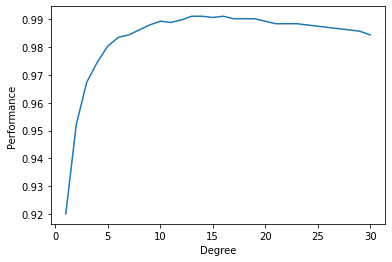

In [44]:
plt.plot(poly_x, poly_y)
plt.xlabel('Degree')
plt.ylabel('Performance')
plt.show()